# ApRES power calculator
This is adapted directly from an excel spreadsheet that can be found here: https://github.com/ldeo-glaciology/phase-sensitive-radar-processing/blob/main/other%20documents/ApRESCalculator.xlsx

In [ ]:
import numpy as np
def calculate_battery_usage(chirps_per_burst = 20, burst_interval = 24*60*60):

    days_per_year = 365.25
    sleep_current = 200. # uA

    bursts_per_year = days_per_year*24*3600/(burst_interval)
    time_per_chirp = 1.01 #s
    time_overhead_per_burst = 5 # s
    battery_voltage = 12 # V

    sleep_time_per_year =days_per_year*24-bursts_per_year*(time_overhead_per_burst+time_per_chirp*chirps_per_burst)/3600# hours
    sleep_bat = sleep_time_per_year*sleep_current/1e6*6/battery_voltage  #Ahr/year

    current_draw = 6/battery_voltage*0.9 #A
    delay_between_chirps = 50 #ms
    number_of_settle_cycles = 0
    bat_per_burst = current_draw*( (time_per_chirp+delay_between_chirps/1000)*(chirps_per_burst+number_of_settle_cycles) + time_overhead_per_burst)/3600 # Ahr
    battery_per_year = sleep_bat + bursts_per_year*bat_per_burst  #Ahr/year
    return battery_per_year


battery_per_year = calculate_battery_usage(chirps_per_burst = 20, burst_interval = 24*60*60)

battery_per_year

2.072538075

(1.0, 20.0)

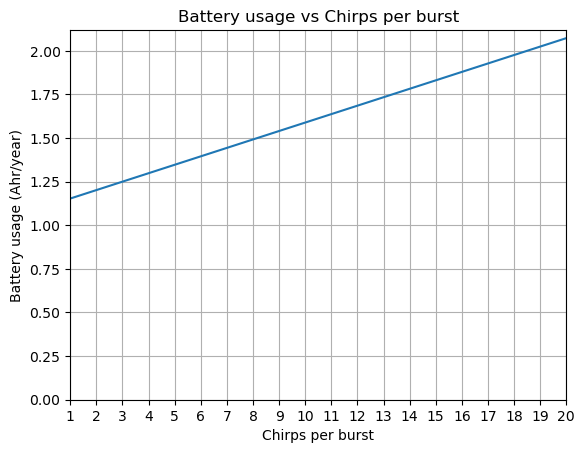

In [32]:
import matplotlib.pyplot as plt
# plot function in matplotlib
chirps_per_burst = np.arange(1, 21)
battery_per_year = calculate_battery_usage(chirps_per_burst = chirps_per_burst, burst_interval = 24*60*60)
plt.plot(chirps_per_burst, battery_per_year)
plt.xlabel('Chirps per burst')
plt.ylabel('Battery usage (Ahr/year)')
plt.title('Battery usage vs Chirps per burst')
# set tick location to intergers
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.ylim(0, None)
plt.xlim(1,20)

(1.0, 20.0)

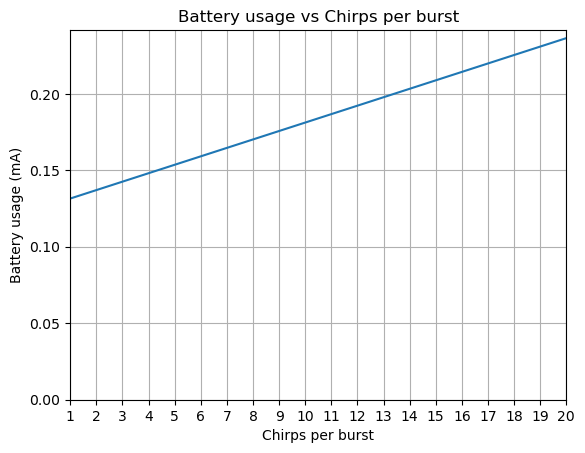

In [36]:
battery_Amps = battery_per_year/365.25/24
plt.plot(chirps_per_burst, battery_Amps*1000)
plt.xlabel('Chirps per burst')
plt.ylabel('Battery usage (mA)')
plt.title('Battery usage vs Chirps per burst')
# set tick location to intergers
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.ylim(0, None)
plt.xlim(1,20)